<a href="https://colab.research.google.com/github/kdemertzis/Earthquakes/blob/main/ANFIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
from sklearn.model_selection import train_test_split 
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from ANFIS import EVOLUTIONARY_ANFIS
import joblib
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score


In [53]:
# New dataset
db = pd.read_csv("https://raw.githubusercontent.com/kdemertzis/Earthquakes/main/Data/3_3class.csv")

In [54]:
db

,HI,PGA,Vmax/amax,ASI,TSIGN,TBRAC,PP,CAV,SED,TUD,EPA,PGV,PGD,Ia,Htot,ecc_tot,Vw1,Vw2,class_3
0,34.69682,0.10302,0.12855,0.08556,18.66689,0.90507,0.24819,304.31962,440.05088,0.27157,0.08422,12.99187,9.37782,0.10914,9.6,0.00,0.00,0.00,A
1,112.31037,0.27556,0.10762,0.21103,20.29793,23.67931,0.40150,1097.23440,1376.04044,6.44857,0.21040,29.09237,9.60392,1.15625,9.6,0.00,0.00,0.00,C
2,54.36072,0.05061,0.25662,0.03496,44.63999,0.00000,1.09836,650.61521,786.00185,0.00000,0.03481,12.74285,11.32263,0.16481,9.6,0.00,0.00,0.00,A
3,49.97794,0.04931,0.24211,0.04257,27.66725,0.00000,1.03692,436.01942,518.85313,0.00000,0.04197,11.71184,5.70295,0.11592,9.6,0.00,0.00,0.00,A
4,145.98159,0.20528,0.17819,0.16116,14.28378,16.20496,0.96125,821.97453,3157.48763,5.02018,0.16156,35.88232,19.61064,0.89886,9.6,0.00,0.00,0.00,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1945,143.41546,0.30391,0.15066,0.23337,17.78367,17.44298,0.31812,882.93392,2651.05629,4.46360,0.23216,44.91805,18.90485,0.84282,22.4,5.96,0.59,0.67,C
1946,103.75376,0.19884,0.14020,0.21175,17.96602,21.21437,0.24739,1010.06525,2377.47394,6.33191,0.21011,27.34765,15.81769,0.96861,22.4,5.96,0.59,0.67,C
1947,68.04170,0.27918,0.06489,0.22260,14.30854,13.46066,0.21909,732.61930,487.70115,3.96085,0.22266,17.77163,3.81008,0.69162,22.4,5.96,0.59,0.67,A
1948,113.34270,0.38092,0.08905,0.37023,9.06208,11.58757,0.27713,1037.34587,1904.84573,5.50291,0.36474,33.27574,18.33504,1.67123,22.4,5.96,0.59,0.67,B


Converting Categorical data to integes so that we can apply ML models.

In [10]:
col = ['Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity']

In [11]:
for i in col:
  db[i] = db[i].map(
                    {'Yes':1 ,'No':0})

In [55]:
db['class_3'] = db['class_3'].map(
                    {'A':0, 'B':0,'C':1})

In [13]:
db['Gender'] = db['Gender'].map(
                    {'Male':1 ,'Female':0})

In [56]:
db

,HI,PGA,Vmax/amax,ASI,TSIGN,TBRAC,PP,CAV,SED,TUD,EPA,PGV,PGD,Ia,Htot,ecc_tot,Vw1,Vw2,class_3
0,34.69682,0.10302,0.12855,0.08556,18.66689,0.90507,0.24819,304.31962,440.05088,0.27157,0.08422,12.99187,9.37782,0.10914,9.6,0.00,0.00,0.00,0
1,112.31037,0.27556,0.10762,0.21103,20.29793,23.67931,0.40150,1097.23440,1376.04044,6.44857,0.21040,29.09237,9.60392,1.15625,9.6,0.00,0.00,0.00,1
2,54.36072,0.05061,0.25662,0.03496,44.63999,0.00000,1.09836,650.61521,786.00185,0.00000,0.03481,12.74285,11.32263,0.16481,9.6,0.00,0.00,0.00,0
3,49.97794,0.04931,0.24211,0.04257,27.66725,0.00000,1.03692,436.01942,518.85313,0.00000,0.04197,11.71184,5.70295,0.11592,9.6,0.00,0.00,0.00,0
4,145.98159,0.20528,0.17819,0.16116,14.28378,16.20496,0.96125,821.97453,3157.48763,5.02018,0.16156,35.88232,19.61064,0.89886,9.6,0.00,0.00,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1945,143.41546,0.30391,0.15066,0.23337,17.78367,17.44298,0.31812,882.93392,2651.05629,4.46360,0.23216,44.91805,18.90485,0.84282,22.4,5.96,0.59,0.67,1
1946,103.75376,0.19884,0.14020,0.21175,17.96602,21.21437,0.24739,1010.06525,2377.47394,6.33191,0.21011,27.34765,15.81769,0.96861,22.4,5.96,0.59,0.67,1
1947,68.04170,0.27918,0.06489,0.22260,14.30854,13.46066,0.21909,732.61930,487.70115,3.96085,0.22266,17.77163,3.81008,0.69162,22.4,5.96,0.59,0.67,0
1948,113.34270,0.38092,0.08905,0.37023,9.06208,11.58757,0.27713,1037.34587,1904.84573,5.50291,0.36474,33.27574,18.33504,1.67123,22.4,5.96,0.59,0.67,0


In [57]:
db.isnull().sum()

HI           0
PGA          0
Vmax/amax    0
ASI          0
TSIGN        0
TBRAC        0
PP           0
CAV          0
SED          0
TUD          0
EPA          0
PGV          0
PGD          0
Ia           0
Htot         0
ecc_tot      0
Vw1          0
Vw2          0
class_3      0
dtype: int64

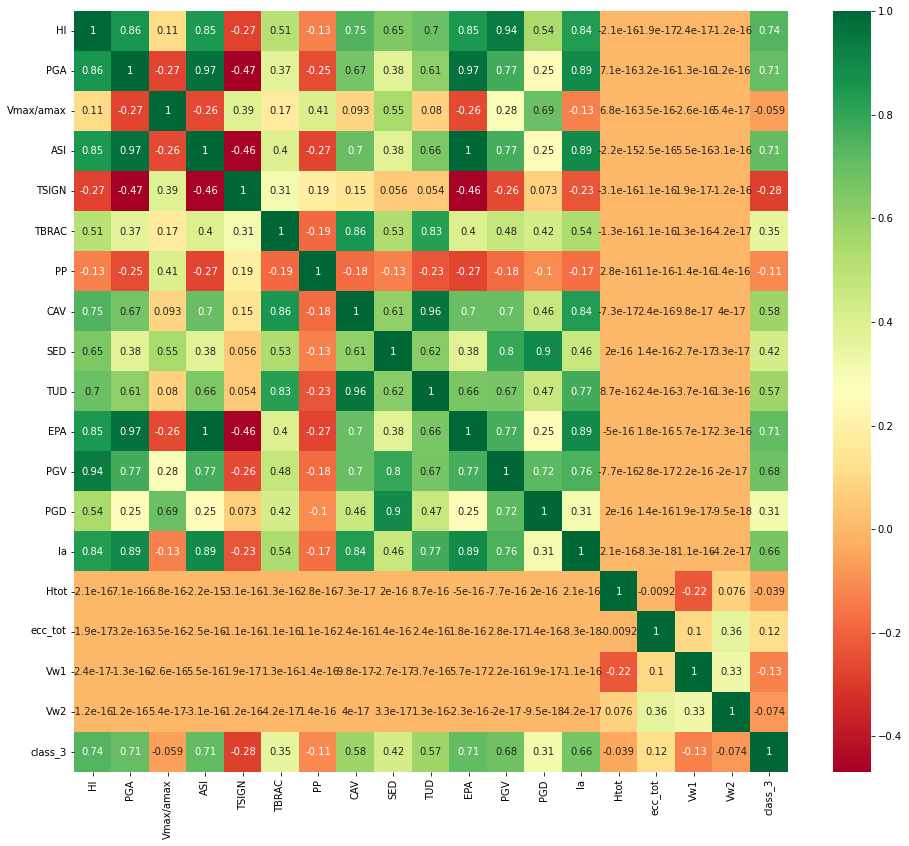

In [58]:
import seaborn as sns
plt.figure(figsize=(16,14))
cor = db.corr()
p = sns.heatmap(db.corr(), annot=True,cmap ='RdYlGn')
plt.show()

In [59]:
X = db.drop(['class_3'],axis='columns')
y = db['class_3']

In [60]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)


scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
scaler_x.fit(X_train)
X_train = scaler_x.transform(X_train)
X_test = scaler_x.transform(X_test)

scaler_y.fit(y_train.values.reshape(-1,1))
y_train = scaler_y.transform(y_train.values.reshape(-1,1))
y_test = scaler_y.transform(y_test.values.reshape(-1,1))



from ANFIS import EVOLUTIONARY_ANFIS

E_Anfis = EVOLUTIONARY_ANFIS(functions=10,generations=50,offsprings=25,
                             mutationRate=0.2,learningRate=0.2,chance=0.7,ruleComb="simple")

bestParam, bestModel = E_Anfis.fit(X_train,y_train,optimize_test_data=False)

bestParam, bestModel = E_Anfis.fit(X_train,y_train,X_test,y_test,optimize_test_data=True)


0 RMSE is:  0.6387590341265178
1 RMSE is:  0.6381840829970218
2 RMSE is:  0.6379627333806631
3 RMSE is:  0.6379627333806631
4 RMSE is:  0.6379185946063398
5 RMSE is:  0.6379185946063398
6 RMSE is:  0.6379185946063398
7 RMSE is:  0.6379185946063398
8 RMSE is:  0.6379185946063398
9 RMSE is:  0.6379185946063398
10 RMSE is:  0.6379185946063398
11 RMSE is:  0.6379185946063398
12 RMSE is:  0.6378688957330179
13 RMSE is:  0.6378688957330179
14 RMSE is:  0.6378688957330179
15 RMSE is:  0.6378688957330179
16 RMSE is:  0.6378688957330179
17 RMSE is:  0.6378528793220622
18 RMSE is:  0.6378528793220622
19 RMSE is:  0.6378451712795048
20 RMSE is:  0.6378451712795048
21 RMSE is:  0.6378451712795048
22 RMSE is:  0.6378451712795048
23 RMSE is:  0.6378451712795048
24 RMSE is:  0.6378451712795048
25 RMSE is:  0.6378451712795048
26 RMSE is:  0.6378451712795048
27 RMSE is:  0.6378451712795048
28 RMSE is:  0.6378451712795048
29 RMSE is:  0.6378451712795048
30 RMSE is:  0.6378451712795048
31 RMSE is:  0.637

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
E_Anfis = EVOLUTIONARY_ANFIS(functions=10,generations=50,offsprings=25,
                             mutationRate=0.2,learningRate=0.2,chance=0.7,ruleComb="simple")
pred_train = E_Anfis.predict(X_train,bestParam,bestModel)
pred_train = pred_train.reshape(-1,1)

for x in pred_train:
    if x[0] < 0.75:
        x[0]=0
    else:
        x[0]=1
print('For ANFIS Model')
print('Training Accuracy' , accuracy_score(y_train,pred_train))

pred_test = E_Anfis.predict(X_test,bestParam,bestModel)
pred_test = pred_test.reshape(-1,1)

for x in pred_test:
    if x[0] < 0.75:
        x[0]=0
    else:
        x[0]=1
print('Testing Accuracy' ,accuracy_score( y_test,pred_test))
print(confusion_matrix(y_test, pred_test))
print(classification_report(y_test,pred_test))

In [73]:

confusion_matrix(y_test, pred_test)

array([[287,  27],
       [140, 131]])

In [74]:
print(confusion_matrix(y_test, pred_test))
print(classification_report(y_test,pred_test))

[[287  27]
 [140 131]]
              precision    recall  f1-score   support

         0.0       0.67      0.91      0.77       314
         1.0       0.83      0.48      0.61       271

    accuracy                           0.71       585
   macro avg       0.75      0.70      0.69       585
weighted avg       0.74      0.71      0.70       585



In [75]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
from sklearn import metrics

predictions = rfc.predict(X_test)
print("Accuracy_Score =", format(metrics.accuracy_score(y_test, predictions)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy_Score = 0.9094017094017094


In [76]:
#Classification report and confusion matrix of random forest model

print('From Random Forest Method')
print("Accuracy_Score =", format(metrics.accuracy_score(y_test, predictions)))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

From Random Forest Method
Accuracy_Score = 0.9094017094017094
[[291  23]
 [ 30 241]]
              precision    recall  f1-score   support

         0.0       0.91      0.93      0.92       314
         1.0       0.91      0.89      0.90       271

    accuracy                           0.91       585
   macro avg       0.91      0.91      0.91       585
weighted avg       0.91      0.91      0.91       585

